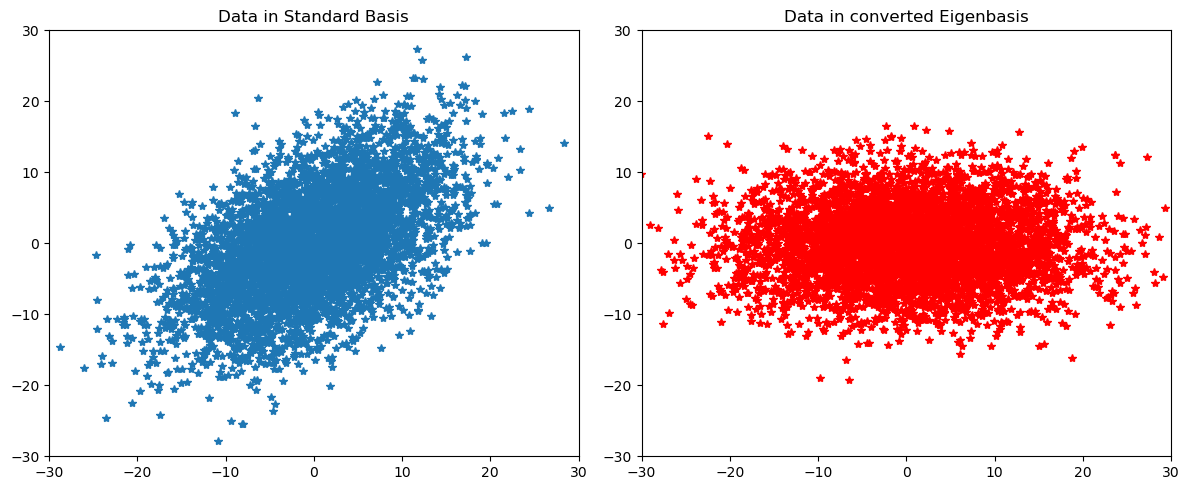

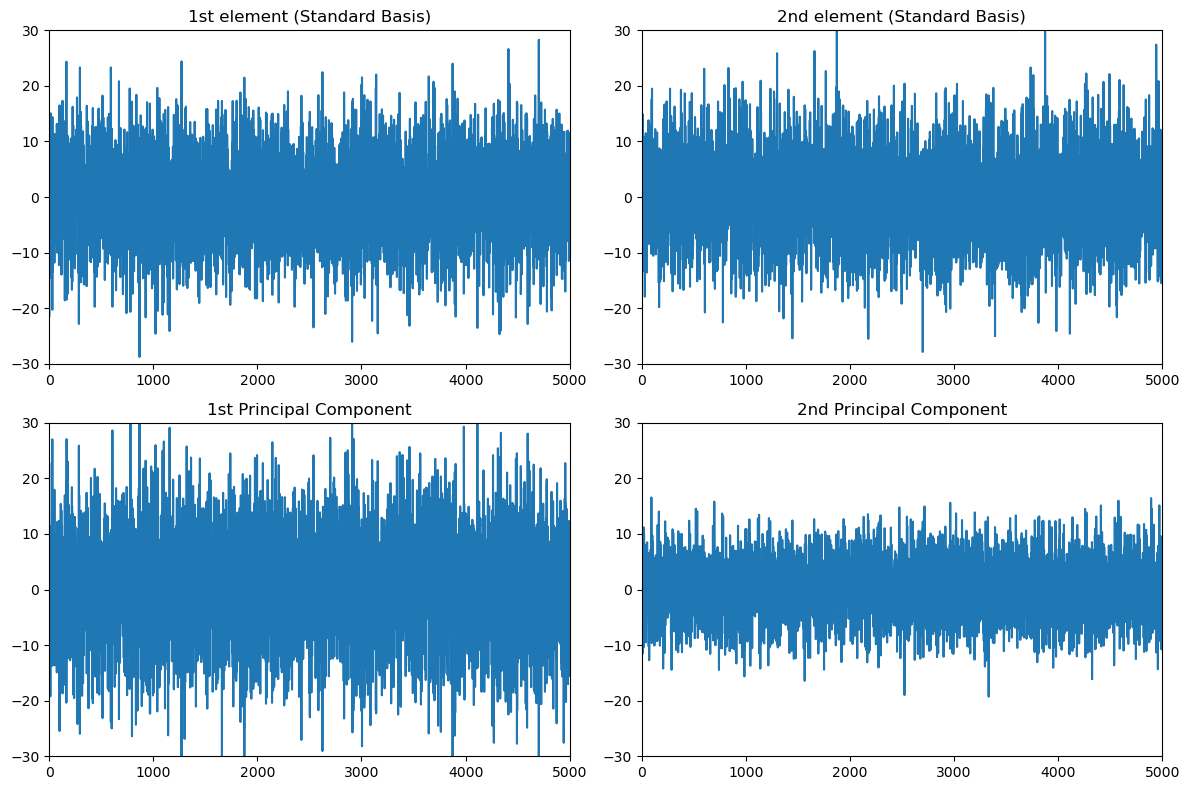

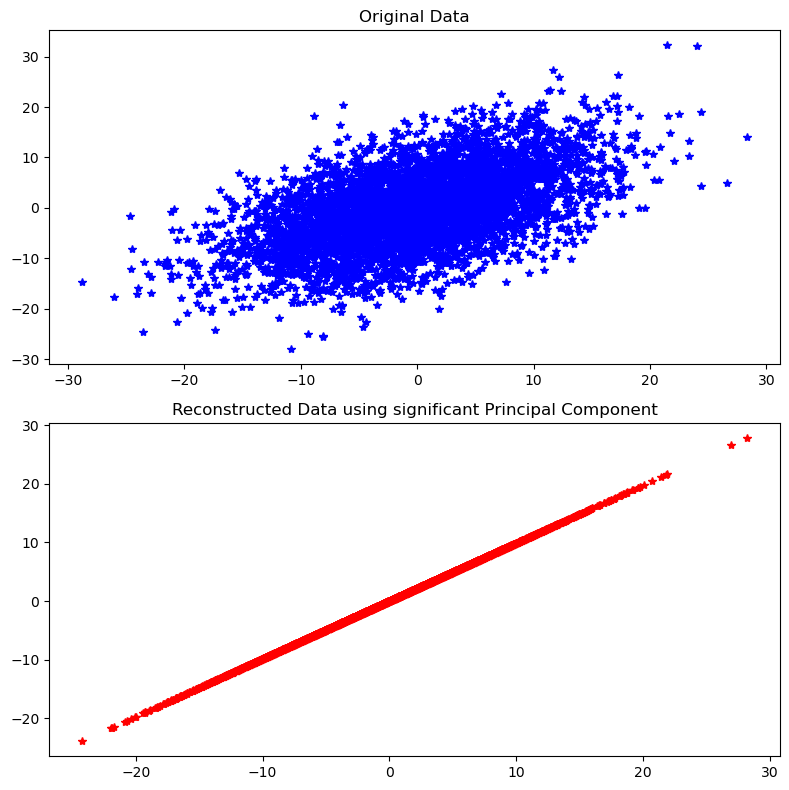

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Data generation
CX = np.array([[0.9, 0.5],[0.5, 0.9]])  # Desired covariance
eigvals, E = np.linalg.eigh(CX)        # Eigen decomposition (eigh for symmetric matrix)
X = np.random.randn(2, 5000)*(8)      # Standard normal data
X = E @ np.diag(np.sqrt(eigvals)) @ X  # Transformation to ensure the desired covariance in the normally distributed data

# PCA
CX_actual = np.cov(X)                  # Actual covariance matrix of X
eigvals_pca, E_pca = np.linalg.eigh(CX_actual)  # PCA eigenvalues/vectors

# Sorting of eigenvalues and eigenvectors in descending order
idx = np.argsort(eigvals_pca)[::-1]
E_pca = E_pca[:, idx]
eigvals_pca = eigvals_pca[idx]

# Projection to PCA space
Y = E_pca.T @ X  # Project to eigenbasis

# Plots: Data in original v/s PCA basis
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(X[0, :], X[1, :], '*')
plt.title("Data in Standard Basis")
plt.axis([-30, 30, -30, 30])

plt.subplot(1, 2, 2)
plt.plot(Y[0, :], Y[1, :], '*r')
plt.title("Data in converted Eigenbasis")
plt.axis([-30, 30, -30, 30])
plt.tight_layout()
plt.savefig("figure 1.png")

# Time-series plot of each component
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(X[0, :])
plt.title("1st element (Standard Basis)")
plt.axis([0, 5000, -30, 30])

plt.subplot(2, 2, 2)
plt.plot(X[1, :])
plt.title("2nd element (Standard Basis)")
plt.axis([0, 5000, -30, 30])

plt.subplot(2, 2, 3)
plt.plot(Y[0, :])
plt.title("1st Principal Component")
plt.axis([0, 5000, -30, 30])

plt.subplot(2, 2, 4)
plt.plot(Y[1, :])
plt.title("2nd Principal Component")
plt.axis([0, 5000, -30, 30])
plt.tight_layout()
plt.savefig("figure 2.png")

# Data Reconstruction (keeping only  major principal component(eigen vector corresponding to highest eigen value)
Z = np.vstack([Y[0, :],np.zeros_like(Y[1, :])])  
X1 = E_pca @ Z                                   # Reconstruct in original space

# Original data vs Reconstructed data
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(X[0, :], X[1, :], 'b*')
plt.title("Original Data")

plt.subplot(2, 1, 2)
plt.plot(X1[0, :], X1[1, :], 'r*')
plt.title("Reconstructed Data using significant Principal Component")
plt.tight_layout()
plt.savefig("figure 3.png")

plt.show()